In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [73]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/paper/concat.csv')
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 2958


In [31]:
data[:5]

,Title,Authors,Abstract,recommand
0,Seamless: Multilingual Expressive and Streamin...,"['Seamless Communication,Loïc Barrault,Yu-An C...",Large-scale automatic speechtranslationsystems...,0
1,MRI Scan Synthesis Methods based on Clustering...,"['Giulia Baldini,Melanie Schmidt,Charlotte Zäs...",We consider a missing data problem in the cont...,0
2,Converting Epics/Stories into Pseudocode using...,"['Gaurav Kolhatkar,Akshit Madan,Nidhi Kowtal,S...",The conversion of user epics or stories into t...,0
3,Improving NeuralMachineTranslationby Multi-Kno...,"['Ke Wang,Jun Xie,Yuqi Zhang,Yu Zhao']",Improving neuralmachinetranslation(NMT) system...,0
4,First Attempt at Building Parallel Corpora for...,"['Atnafu Lambebo Tonja,Melkamu Mersha,Ananya K...",This paper presents the creation of initial bi...,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      2957 non-null   object
 1   Authors    2958 non-null   object
 2   Abstract   2958 non-null   object
 3   recommand  2958 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 92.6+ KB


In [33]:
data.dropna(subset=['Title'], axis=0, inplace=True)

In [34]:
print('결측값 여부 :',data.isnull().sum())

결측값 여부 : Title        0
Authors      0
Abstract     0
recommand    0
dtype: int64


<Axes: >

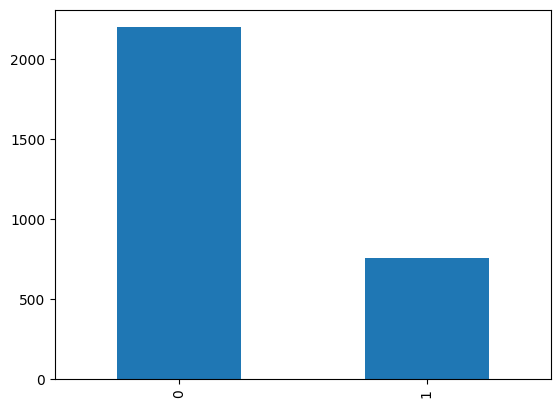

In [35]:
data['recommand'].value_counts().plot(kind='bar')

In [36]:
print('좋은 논문과 안좋은 논문의 개수')
print(data.groupby('recommand').size().reset_index(name='count'))

좋은 논문과 안좋은 논문의 개수
   recommand  count
0          0   2198
1          1    759


In [37]:
print(f'안좋은 논문의 비율 = {round(data["recommand"].value_counts()[0]/len(data) * 100,3)}%')
print(f'좋은 논문의 비율 = {round(data["recommand"].value_counts()[1]/len(data) * 100,3)}%')

안좋은 논문의 비율 = 74.332%
좋은 논문의 비율 = 25.668%


In [38]:
X_data = data['Abstract']
y_data = data['recommand']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [40]:
print('--------훈련 데이터의 비율-----------')
print(f'안좋은 논문 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'좋은 논문 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
안좋은 논문 = 74.334%
좋은 논문 = 25.666%


In [41]:
print('--------테스트 데이터의 비율-----------')
print(f'안좋은 논문 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'좋은 논문 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
안좋은 논문 = 74.324%
좋은 논문 = 25.676%


In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[12, 39, 602, 5, 38, 10, 282, 190, 698, 138, 4, 138, 1262, 1589, 2397, 16, 32, 5, 1695, 2, 5, 256, 174, 44, 1085, 423, 9024, 15, 38, 26, 7, 1590, 9024, 2397, 11, 6492, 6, 10, 30, 126, 491, 468, 698, 3417, 4088, 41, 46, 595, 2176, 8, 314, 1086, 28, 119, 786, 805, 138, 4, 138, 5776, 121, 69, 1818, 321, 32, 5, 176, 1086, 44, 200, 11, 463, 4, 265, 3418, 314, 509, 1263, 1354, 4, 984, 59, 46, 2331, 3, 363, 491, 109, 182, 2757, 2, 28, 350, 4, 265, 9025, 699, 7552, 314, 2398, 211, 100, 9, 5, 190, 698, 138, 4, 138, 1439, 1307, 1589, 56, 2399, 10, 1, 55, 38, 522, 536, 1629, 131, 3, 1439, 709, 124, 5, 45, 2, 1, 58, 38, 23, 9, 1355, 9026, 1264], [1, 837, 2, 598, 1960, 6, 637, 637, 260, 50, 5777, 25, 710, 4, 1777, 1371, 1738, 3, 2758, 1122, 6, 342, 4, 201, 1, 92, 2, 1, 837, 2, 598, 1960, 515, 5166, 4, 572, 5, 2668, 3827, 16, 1164, 123, 998, 73, 4, 1630, 406, 328, 7553, 400, 6, 1, 3827, 1961, 34, 120, 2669, 548, 1, 177, 2, 658, 6, 1, 3827, 770, 123, 4750, 3, 477, 6, 5, 7554, 3827, 30, 689, 5, 1501,

In [43]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'the': 1, 'of': 2, 'and': 3, 'to': 4, 'a': 5, 'in': 6, 'we': 7, 'for': 8, 'on': 9, 'that': 10, 'is': 11, 'this': 12, 'with': 13, 'as': 14, 'our': 15, 'by': 16, 'model': 17, 'data': 18, 'an': 19, 'are': 20, 'from': 21, 'models': 22, 'based': 23, 'learning': 24, 'can': 25, 'which': 26, 'be': 27, 'training': 28, 'performance': 29, 'it': 30, 'these': 31, 'using': 32, 'methods': 33, 'such': 34, 'results': 35, 'approach': 36, 'have': 37, 'method': 38, 'paper': 39, 'neural': 40, 'or': 41, 'at': 42, 'tasks': 43, 'network': 44, 'state': 45, 'time': 46, 'has': 47, 'propose': 48, 'their': 49, 'networks': 50, 'also': 51, 'show': 52, 'however': 53, 'more': 54, 'proposed': 55, 'task': 56, 'image': 57, 'art': 58, 'real': 59, 'while': 60, 'between': 61, 'high': 62, 'work': 63, 'graph': 64, 'language': 65, 'framework': 66, 'its': 67, 'new': 68, 'different': 69, 'datasets': 70, 'novel': 71, 'large': 72, 'information': 73, 'two': 74, 'both': 75, 'into': 76, 'deep': 77, 'used': 78, 'not': 79, 'dataset': 

In [44]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


등장 빈도가 1번 이하인 희귀 단어의 수: 8518
단어 집합(vocabulary)에서 희귀 단어의 비율: 41.96265825902754
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.9820180378067962


In [45]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))


단어 집합의 크기: 20300


Abstract의 최대 길이 : 627
Abstract의 평균 길이 : 181.718393


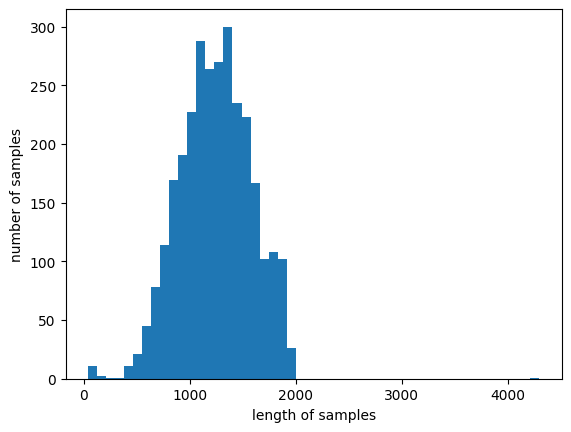

In [46]:
print('Abstract의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('Abstract의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [47]:
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)


훈련 데이터의 크기(shape): (2365, 189)


In [54]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=100, batch_size=64, validation_split=0.2)


Epoch 1/100
30/30 [==============================] - 3s 56ms/step - loss: 0.5437 - acc: 0.7421 - val_loss: 0.4757 - val_acc: 0.7844
Epoch 2/100
30/30 [==============================] - 2s 52ms/step - loss: 0.3892 - acc: 0.8568 - val_loss: 0.4465 - val_acc: 0.8161
Epoch 3/100
30/30 [==============================] - 2s 56ms/step - loss: 0.3048 - acc: 0.8805 - val_loss: 0.6178 - val_acc: 0.5581
Epoch 4/100
30/30 [==============================] - 2s 57ms/step - loss: 0.2220 - acc: 0.9329 - val_loss: 0.3529 - val_acc: 0.8647
Epoch 5/100
30/30 [==============================] - 2s 58ms/step - loss: 0.1080 - acc: 0.9725 - val_loss: 0.3259 - val_acc: 0.8816
Epoch 6/100
30/30 [==============================] - 4s 130ms/step - loss: 0.0819 - acc: 0.9752 - val_loss: 0.3669 - val_acc: 0.8499
Epoch 7/100
30/30 [==============================] - 3s 93ms/step - loss: 0.0363 - acc: 0.9958 - val_loss: 0.3057 - val_acc: 0.8901
Epoch 8/100
30/30 [==============================] - 3s 114ms/step - loss: 

19/19 [==============================] - 0s 12ms/step - loss: 0.8169 - acc: 0.8345

 테스트 정확도: 0.8345


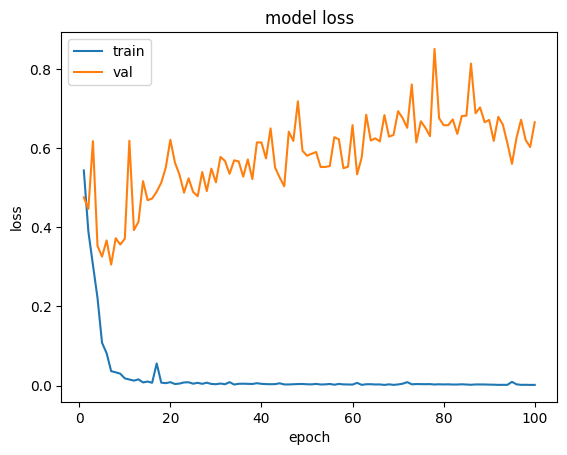

In [55]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [56]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
30/30 [==============================] - 57s 171ms/step - loss: 0.5863 - acc: 0.7294 - val_loss: 0.5239 - val_acc: 0.7674
Epoch 2/100
30/30 [==============================] - 3s 96ms/step - loss: 0.4828 - acc: 0.7780 - val_loss: 0.4368 - val_acc: 0.8224
Epoch 3/100
30/30 [==============================] - 3s 96ms/step - loss: 0.3046 - acc: 0.8975 - val_loss: 0.3192 - val_acc: 0.8732
Epoch 4/100
30/30 [==============================] - 3s 92ms/step - loss: 0.2201 - acc: 0.9371 - val_loss: 0.2841 - val_acc: 0.8985
Epoch 5/100
30/30 [==============================] - 4s 130ms/step - loss: 0.1508 - acc: 0.9646 - val_loss: 0.4753 - val_acc: 0.7526
Epoch 6/100
30/30 [==============================] - 4s 146ms/step - loss: 0.1050 - acc: 0.9741 - val_loss: 0.3101 - val_acc: 0.8732
Epoch 7/100
30/30 [==============================] - 3s 96ms/step - loss: 0.0891 - acc: 0.9773 - val_loss: 0.2587 - val_acc: 0.9070
Epoch 8/100
30/30 [==============================] - 3s 92ms/step - loss

19/19 [==============================] - 0s 18ms/step - loss: 0.5859 - acc: 0.8919

 테스트 정확도: 0.8919


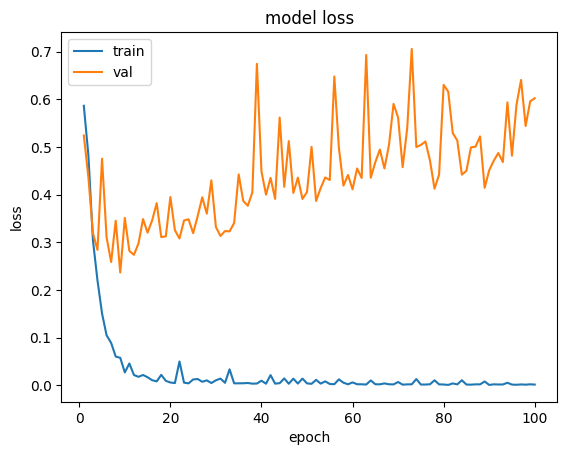

In [57]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [58]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
30/30 [==============================] - 7s 156ms/step - loss: 0.6130 - acc: 0.7215 - val_loss: 0.5104 - val_acc: 0.7674
Epoch 2/100
30/30 [==============================] - 5s 150ms/step - loss: 0.4919 - acc: 0.7833 - val_loss: 0.4411 - val_acc: 0.8266
Epoch 3/100
30/30 [==============================] - 3s 94ms/step - loss: 0.3962 - acc: 0.8367 - val_loss: 0.3887 - val_acc: 0.8372
Epoch 4/100
30/30 [==============================] - 3s 92ms/step - loss: 0.2944 - acc: 0.8732 - val_loss: 0.3468 - val_acc: 0.8605
Epoch 5/100
30/30 [==============================] - 3s 94ms/step - loss: 0.1865 - acc: 0.9334 - val_loss: 0.3211 - val_acc: 0.8541
Epoch 6/100
30/30 [==============================] - 4s 139ms/step - loss: 0.1102 - acc: 0.9656 - val_loss: 0.3389 - val_acc: 0.8901
Epoch 7/100
30/30 [==============================] - 4s 141ms/step - loss: 0.0730 - acc: 0.9841 - val_loss: 0.3490 - val_acc: 0.8858
Epoch 8/100
30/30 [==============================] - 3s 93ms/step - loss

19/19 [==============================] - 0s 17ms/step - loss: 0.7253 - acc: 0.8801

 테스트 정확도: 0.8801


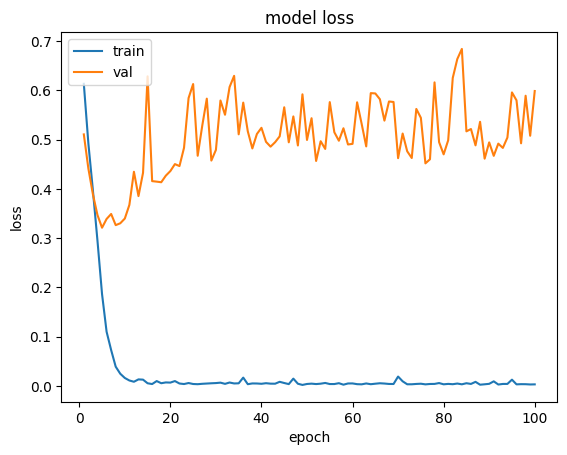

In [59]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [60]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, Bidirectional
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
30/30 [==============================] - 13s 271ms/step - loss: 0.5983 - acc: 0.7294 - val_loss: 0.5326 - val_acc: 0.7674
Epoch 2/100
30/30 [==============================] - 5s 154ms/step - loss: 0.5403 - acc: 0.7378 - val_loss: 0.4811 - val_acc: 0.7674
Epoch 3/100
30/30 [==============================] - 6s 199ms/step - loss: 0.4103 - acc: 0.8330 - val_loss: 0.4243 - val_acc: 0.8266
Epoch 4/100
30/30 [==============================] - 6s 209ms/step - loss: 0.2943 - acc: 0.9059 - val_loss: 0.2939 - val_acc: 0.8964
Epoch 5/100
30/30 [==============================] - 5s 153ms/step - loss: 0.2018 - acc: 0.9429 - val_loss: 0.2712 - val_acc: 0.8964
Epoch 6/100
30/30 [==============================] - 5s 184ms/step - loss: 0.1424 - acc: 0.9487 - val_loss: 0.2554 - val_acc: 0.9112
Epoch 7/100
30/30 [==============================] - 7s 222ms/step - loss: 0.1029 - acc: 0.9656 - val_loss: 0.2751 - val_acc: 0.8922
Epoch 8/100
30/30 [==============================] - 5s 154ms/step -

19/19 [==============================] - 1s 28ms/step - loss: 0.5495 - acc: 0.9122

 테스트 정확도: 0.9122


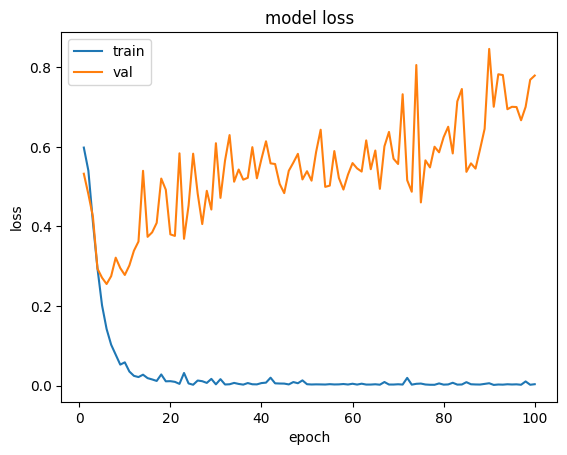

In [61]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [64]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units, return_sequences=True))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=100, batch_size=64, validation_split=0.2)


Epoch 1/100
30/30 [==============================] - 8s 188ms/step - loss: 0.5570 - acc: 0.7310 - val_loss: 0.4801 - val_acc: 0.8118
Epoch 2/100
30/30 [==============================] - 3s 108ms/step - loss: 0.3404 - acc: 0.8774 - val_loss: 0.3879 - val_acc: 0.8541
Epoch 3/100
30/30 [==============================] - 3s 89ms/step - loss: 0.1117 - acc: 0.9762 - val_loss: 0.5240 - val_acc: 0.7463
Epoch 4/100
30/30 [==============================] - 3s 95ms/step - loss: 0.0225 - acc: 0.9979 - val_loss: 0.5634 - val_acc: 0.7674
Epoch 5/100
30/30 [==============================] - 3s 91ms/step - loss: 0.0114 - acc: 0.9984 - val_loss: 0.5133 - val_acc: 0.8161
Epoch 6/100
30/30 [==============================] - 5s 164ms/step - loss: 0.0074 - acc: 0.9984 - val_loss: 0.5731 - val_acc: 0.7801
Epoch 7/100
30/30 [==============================] - 4s 117ms/step - loss: 0.0075 - acc: 0.9968 - val_loss: 0.6053 - val_acc: 0.8055
Epoch 8/100
30/30 [==============================] - 4s 130ms/step - los

19/19 [==============================] - 0s 19ms/step - loss: 0.9871 - acc: 0.7635

 테스트 정확도: 0.7635


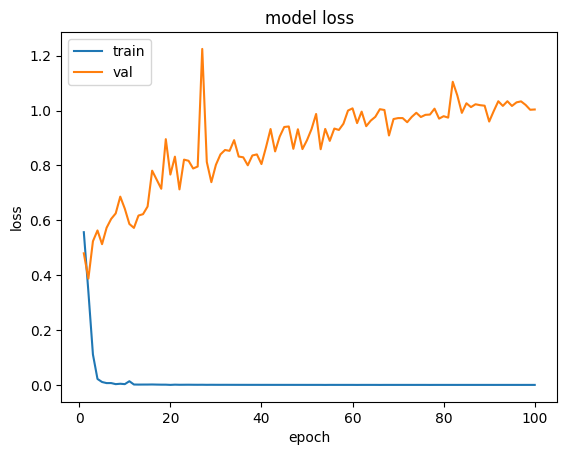

In [65]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [66]:
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units, return_sequences=True))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=100, batch_size=64, validation_split=0.2)


Epoch 1/100
30/30 [==============================] - 6s 115ms/step - loss: 0.6074 - acc: 0.7278 - val_loss: 0.5354 - val_acc: 0.7674
Epoch 2/100
30/30 [==============================] - 4s 144ms/step - loss: 0.5297 - acc: 0.7458 - val_loss: 0.4390 - val_acc: 0.8076
Epoch 3/100
30/30 [==============================] - 4s 138ms/step - loss: 0.3646 - acc: 0.8705 - val_loss: 0.3210 - val_acc: 0.8732
Epoch 4/100
30/30 [==============================] - 3s 98ms/step - loss: 0.2389 - acc: 0.9249 - val_loss: 0.2738 - val_acc: 0.8985
Epoch 5/100
30/30 [==============================] - 3s 94ms/step - loss: 0.1773 - acc: 0.9530 - val_loss: 0.2684 - val_acc: 0.8901
Epoch 6/100
30/30 [==============================] - 3s 101ms/step - loss: 0.1269 - acc: 0.9683 - val_loss: 0.2564 - val_acc: 0.8901
Epoch 7/100
30/30 [==============================] - 5s 154ms/step - loss: 0.0938 - acc: 0.9826 - val_loss: 0.2537 - val_acc: 0.8964
Epoch 8/100
30/30 [==============================] - 4s 134ms/step - lo

19/19 [==============================] - 0s 21ms/step - loss: 0.4315 - acc: 0.9122

 테스트 정확도: 0.9122


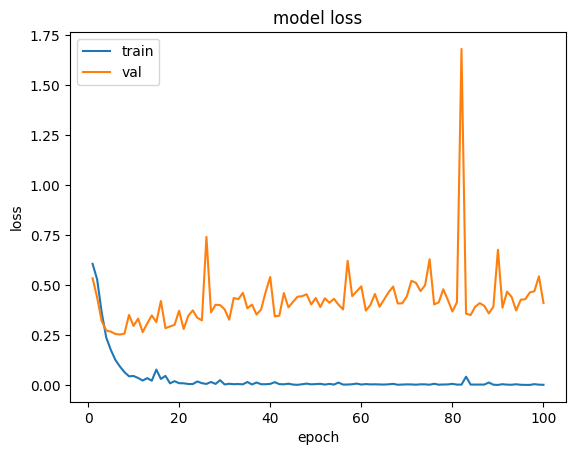

In [67]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [68]:
from tensorflow.keras.layers import GRU, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units, return_sequences=True))  # First GRU layer
model.add(GRU(hidden_units))  # Second GRU layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=100, batch_size=64, validation_split=0.2)


Epoch 1/100
30/30 [==============================] - 13s 285ms/step - loss: 0.5876 - acc: 0.7310 - val_loss: 0.5066 - val_acc: 0.7674
Epoch 2/100
30/30 [==============================] - 5s 180ms/step - loss: 0.4604 - acc: 0.8007 - val_loss: 0.4012 - val_acc: 0.8372
Epoch 3/100
30/30 [==============================] - 9s 316ms/step - loss: 0.3085 - acc: 0.8710 - val_loss: 0.3611 - val_acc: 0.8541
Epoch 4/100
30/30 [==============================] - 5s 178ms/step - loss: 0.1788 - acc: 0.9318 - val_loss: 0.3857 - val_acc: 0.8436
Epoch 5/100
30/30 [==============================] - 6s 212ms/step - loss: 0.0932 - acc: 0.9635 - val_loss: 0.4205 - val_acc: 0.8414
Epoch 6/100
30/30 [==============================] - 7s 242ms/step - loss: 0.0500 - acc: 0.9831 - val_loss: 0.4785 - val_acc: 0.8393
Epoch 7/100
30/30 [==============================] - 5s 177ms/step - loss: 0.0235 - acc: 0.9942 - val_loss: 0.5420 - val_acc: 0.8541
Epoch 8/100
30/30 [==============================] - 8s 261ms/step -

19/19 [==============================] - 1s 35ms/step - loss: 0.9048 - acc: 0.8733

 테스트 정확도: 0.8733


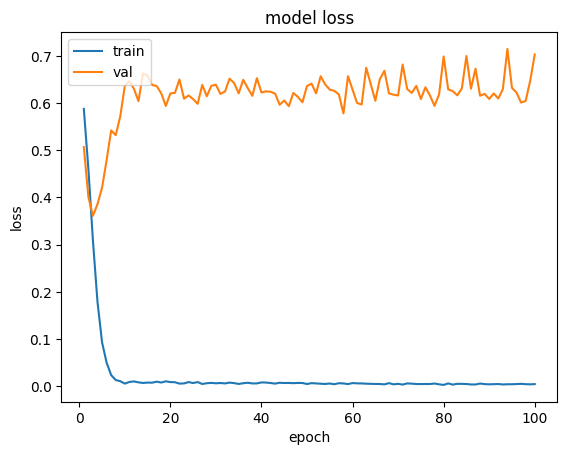

In [69]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [70]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, Bidirectional, LSTM
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))  # First Bidirectional LSTM layer
model.add(Bidirectional(LSTM(hidden_units)))  # Second Bidirectional LSTM layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=100, batch_size=64, validation_split=0.2)


Epoch 1/100
30/30 [==============================] - 25s 483ms/step - loss: 0.5967 - acc: 0.7299 - val_loss: 0.5382 - val_acc: 0.7674
Epoch 2/100
30/30 [==============================] - 10s 325ms/step - loss: 0.5544 - acc: 0.7378 - val_loss: 0.4877 - val_acc: 0.7674
Epoch 3/100
30/30 [==============================] - 13s 427ms/step - loss: 0.3839 - acc: 0.8388 - val_loss: 0.3649 - val_acc: 0.8710
Epoch 4/100
30/30 [==============================] - 13s 454ms/step - loss: 0.2322 - acc: 0.9265 - val_loss: 0.2849 - val_acc: 0.8837
Epoch 5/100
30/30 [==============================] - 12s 392ms/step - loss: 0.1343 - acc: 0.9635 - val_loss: 0.3007 - val_acc: 0.9049
Epoch 6/100
30/30 [==============================] - 11s 372ms/step - loss: 0.0711 - acc: 0.9841 - val_loss: 0.3008 - val_acc: 0.9133
Epoch 7/100
30/30 [==============================] - 14s 456ms/step - loss: 0.0685 - acc: 0.9831 - val_loss: 0.2927 - val_acc: 0.9027
Epoch 8/100
30/30 [==============================] - 13s 438ms